## Curve fitting Lecture 10

### Explicit coding of simple linear regression problem
Fit a linear trend to data: 
    $$y=ax+b$$
where *a* and *b* are parameters to be estimated 
    $$y_{obs} = y + \sigma*N(0,1)$$
where N(0,1) is Gaussian

Model: a=5.000, b=1.000
Est  : a=5.329, b=0.925
Sig  : a=0.307, b=0.052


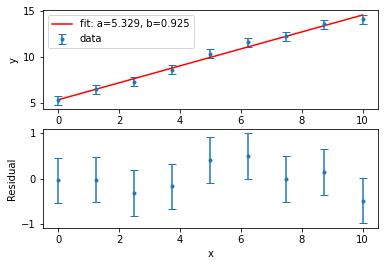

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
xdata = np.linspace(0, 10, 9)
ndata = xdata.size  # number of data points
model = (5,1) # Model values for a and b
y = model[0]+model[1]*xdata
rng = np.random.default_rng(13)
# Generate a set of sigma (make low and high same for
# constant errors)
sig = 0.5*rng.uniform(low=1.0, high=1.0,size=ndata)
#sig = 0.5*rng.uniform(low=0.1, high=5.0,size=ndata)
# Generate y+noise and add to modeled y-values.
y_noise = sig*rng.normal(size=ndata)
ydata = y + y_noise

# Explicit: Jacobian/Partials matrix A.
A = np.transpose([np.ones(ndata),xdata])
wgh = 1/sig**2
NormEQ = np.matmul(np.transpose(A)*wgh,A)
Bvec = np.matmul(np.transpose(A)*wgh,np.transpose(ydata))
MCov = np.linalg.inv(NormEQ)
MEst = np.matmul(MCov,Bvec)
print("Model: a=%5.3f, b=%5.3f" % model )
print("Est  : a=%5.3f, b=%5.3f" % tuple(MEst) )
print("Sig  : a=%5.3f, b=%5.3f" % tuple(np.sqrt(np.diag(MCov))) )

# Plot results:
plt.subplot(2,1,1)
plt.errorbar(xdata, ydata, sig, marker='.', 
             linestyle=' ',capsize=4, label='data')
plt.plot(xdata, np.matmul(A,MEst), 'r-',
         label='fit: a=%5.3f, b=%5.3f' % tuple(MEst))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# Now show residuals
plt.subplot(2,1,2)
plt.errorbar(xdata, ydata-np.matmul(A,MEst), sig, marker='.', 
             linestyle=' ',capsize=4, label='data')
plt.xlabel('x')
plt.ylabel('Residual')
plt.show()



In [2]:
# Now repeat with polyfit
pn, cov = np.polyfit(xdata,ydata,1,cov=True)
print("Model: a=%5.3f, b=%5.3f" % model )
print("Est  : a=%5.3f, b=%5.3f" % tuple(np.flip(pn)))
print("Sig  : a=%5.3f, b=%5.3f" % tuple(np.flip(np.sqrt(np.diag(cov)))))

Model: a=5.000, b=1.000
Est  : a=5.329, b=0.925
Sig  : a=0.207, b=0.035


In [3]:
# Now repeat with polyfit with data weights (notice 1/sigma for Gaussian model)
# Generally weights are 1/(sig**2) or inverse of covariance matrix.
print('polyfit with data weights')
pn, cov = np.polyfit(xdata,ydata,1,cov=True,w=np.sqrt(wgh))
print("Model: a=%5.3f, b=%5.3f" % model )
print("Est  : a=%5.3f, b=%5.3f" % tuple(np.flip(pn)))
print("Sig  : a=%5.3f, b=%5.3f" % tuple(np.flip(np.sqrt(np.diag(cov)))))
print('polyfit with data weights, model covariance unscaled')
pn, cov = np.polyfit(xdata,ydata,1,cov='unscaled',w=np.sqrt(wgh))
print("Model: a=%5.3f, b=%5.3f" % model )
print("Est  : a=%5.3f, b=%5.3f" % tuple(np.flip(pn)))
print("Sig  : a=%5.3f, b=%5.3f" % tuple(np.flip(np.sqrt(np.diag(cov)))))
print("Compare result above with output from explicit estimates")

polyfit with data weights
Model: a=5.000, b=1.000
Est  : a=5.329, b=0.925
Sig  : a=0.207, b=0.035
polyfit with data weights, model covariance unscaled
Model: a=5.000, b=1.000
Est  : a=5.329, b=0.925
Sig  : a=0.307, b=0.052
Compare result above with output from explicit estimates


Model: a=3.500, b=1.300, c=0.500
Est  : a=2.594, b=1.629, c=0.523
Sig  : a=0.147, b=0.192, c=0.046
Bounded: [3,1,0.5]
Est b: a=3.000, b=1.919, c=0.500
Sig b: a=0.167, b=0.199, c=0.049


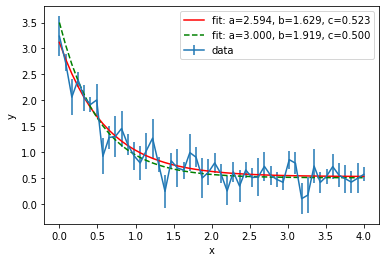

In [4]:
# Example using curve_fit
# (from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define fit function: Notice this is non-linear for 
# parameter b
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Plot the raw data
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng(10)
sig = 0.2*rng.uniform(low=0.5, high=2.,size=xdata.size)
# Uncomment line below to set very small error bars on some 
# points.
# sig[1] = 0.001 ; sig[10]=0.001 ; 
# y_noise = 0.2 * rng.normal(size=xdata.size)
y_noise = sig*rng.normal(size=xdata.size)
ydata = y + y_noise
plt.errorbar(xdata, ydata, sig, label='data')
print("Model: a=%5.3f, b=%5.3f, c=%5.3f" % (3.5,1.3,0.5) )
popt, pcov = curve_fit(func, xdata, ydata, sigma=sig, absolute_sigma=True)
print("Est  : a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt) )
print("Sig  : a=%5.3f, b=%5.3f, c=%5.3f" % tuple(np.sqrt(np.diag(pcov))) )


# * syntax must pass array as individal elements
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

# Now bound values
print('Bounded: [3,1,0.5]')
popt, pcov = curve_fit(func, xdata, ydata, bounds=([3.,0.,0.], [4., 2., 0.5]))
print("Est b: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(popt) )
print("Sig b: a=%5.3f, b=%5.3f, c=%5.3f" % tuple(np.sqrt(np.diag(pcov))) )
plt.plot(xdata, func(xdata, *popt), 'g--',
        label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Model: a=2.500, b=2.00000, c=0.500
Est  : a=2.464, b=2.00026, c=0.453
Sig  : a=0.044, b=0.00140, c=0.030


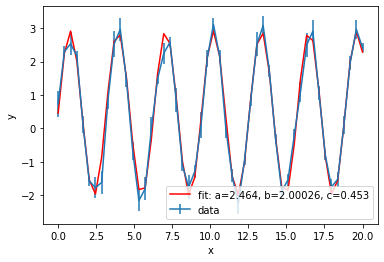

In [7]:
# Another case: Now more complicated: Estimate the frequency of a wave
# given time samples.
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Define fit function: Notice this is non-linear for 
# parameter b
def func(x, a, b, c):
    return a * np.sin(b * x) + c

# Plot the raw data
xdata = np.linspace(0, 20, 50)
model = [2.5, 2, 0.5]
apriori = np.copy(model) ;  # See what happens if np.copy not used
# Now try changing apriori to see impact:
# Linear terms: [0] and [2]
#apriori[0]=100
apriori[1]=1.85 # See how far we can deviate before wrong result.
y = func(xdata, *model)
rng = np.random.default_rng(10)
sig = 0.2*rng.uniform(low=0.5, high=2.,size=xdata.size)
# Uncomment line below to set very small error bars on some 
# points.
# sig[1] = 0.001 ; sig[10]=0.001 ; 
# y_noise = 0.2 * rng.normal(size=xdata.size)
y_noise = sig*rng.normal(size=xdata.size)
ydata = y + y_noise
plt.errorbar(xdata, ydata, sig, label='data')
print("Model: a=%5.3f, b=%7.5f, c=%5.3f" % tuple(model) )
popt, pcov = curve_fit(func, xdata, ydata, p0=apriori , 
                       sigma=sig, absolute_sigma=True)
print("Est  : a=%5.3f, b=%7.5f, c=%5.3f" % tuple(popt) )
print("Sig  : a=%5.3f, b=%7.5f, c=%5.3f" % tuple(np.sqrt(np.diag(pcov))) )


# * syntax must pass array as individal elements
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%7.5f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()